# OMSF 2025: Joint Demo



Lets imagine we are we are computational medicinal chemists assisting a project team working on ligand design for a biological target, in this case **MCL1** a protein that is a well established target for oncology. 

In [5]:
import nglview

nglview.show_file("source/openfe/protein.pdb")

NGLWidget()

In [6]:
import pandas

design_set = pandas.read_csv("source/openadmet/ligands.csv")
design_set

,SMILES
0,O=C([O-])c1cc2ccccc2s1
1,O=C([O-])c1sc2ccccc2c1Cl
2,N1C(C#N)=CC2C(Cl)=C(N3C=NC=C3)C(Cl)=CC1=2
3,O=C([O-])c1sc2cccc(Cl)c2c1Cl
4,N1C(C(N)=O)=CC2C=CC(S(C)(C)C)=CC1=2
5,O=C([O-])c1sc2cc(Cl)ccc2c1Cl
6,Cc1ccc2c(Cl)c(C(=O)[O-])sc2c1
7,O=C([O-])c1cc2ccccc2o1
8,Cc1c(C(=O)[O-])oc2ccc(Cl)cc12
9,Cc1c(C(=O)[O-])oc2cc(Cl)ccc12


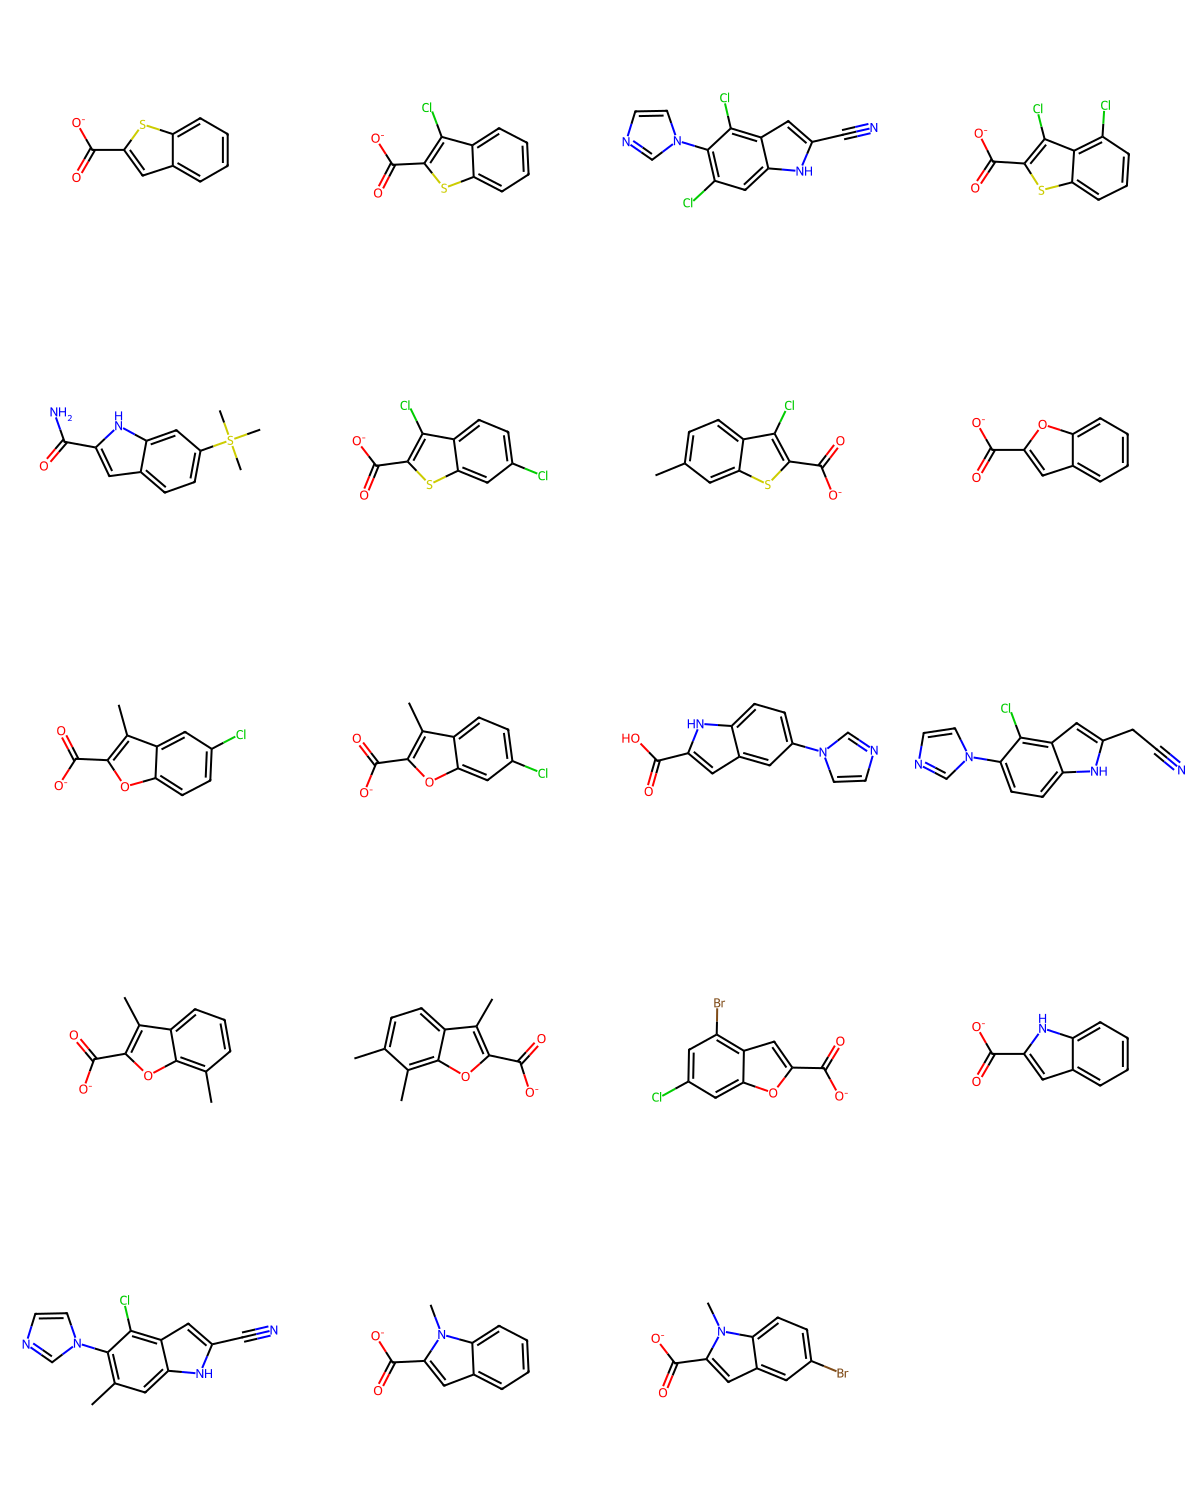

In [7]:
import datamol

design_set["mol"] = design_set["SMILES"].apply(datamol.to_mol)
datamol.to_image(design_set["mol"])

In [16]:
!openadmet predict \
    --input-path ./source/openadmet/ligands.csv \
    --input-col SMILES \
    --model-dir ./source/openadmet/cyp3a4_anvil_lgbm  \
    --model-dir ./source/openadmet/cyp2d6_anvil_lgbm  \
    --model-dir ./source/openadmet/cyp2c9_anvil_lgbm  \
    --output-path ./predictions.csv

[04/29/25 17:46:31] INFO     Starting prediction                   ]8;id=477605;file:///Users/mattthompson/micromamba/envs/demo/lib/python3.12/site-packages/openadmet/models/cli/predict.py\predict.py]8;;\:]8;id=326710;file:///Users/mattthompson/micromamba/envs/demo/lib/python3.12/site-packages/openadmet/models/cli/predict.py#76\76]8;;\
                    INFO     Input path:                           ]8;id=986814;file:///Users/mattthompson/micromamba/envs/demo/lib/python3.12/site-packages/openadmet/models/cli/predict.py\predict.py]8;;\:]8;id=332204;file:///Users/mattthompson/micromamba/envs/demo/lib/python3.12/site-packages/openadmet/models/cli/predict.py#77\77]8;;\
                             ./source/openadmet/ligands.csv                     
                    INFO     Model directories:                    ]8;id=550046;file:///Users/mattthompson/micromamba/envs/demo/lib/python3.12/site-packages/openadmet/models/cli/predict.py\predict.py]8;;\:]8;id=81937;file:

In [31]:
predictions = pandas.read_csv("predictions.csv")
predictions.sort_values("OADMET_PRED_openadmet-CYP3A4-pchembl-lgbm", ascending=False)

,SMILES,OADMET_PRED_openadmet-CYP3A4-pchembl-lgbm,OADMET_PRED_openadmet-CYP2D6-pchembl-lgbm,OADMET_PRED_openadmet-CYP2C9-pchembl-lgbm
11,N1C(CC#N)=CC2C(Cl)=C(N3C=NC=C3)C=CC1=2,5.836534,5.041812,5.233679
2,N1C(C#N)=CC2C(Cl)=C(N3C=NC=C3)C(Cl)=CC1=2,5.818979,5.097820,5.354648
16,N1C(C#N)=CC2C(Cl)=C(N3C=NC=C3)C(C)=CC1=2,5.722701,4.880550,5.293466
10,N1C(C(O)=O)=CC2C=C(N3C=NC=C3)C=CC1=2,5.646662,5.083585,5.329742
4,N1C(C(N)=O)=CC2C=CC(S(C)(C)C)=CC1=2,5.616661,4.989222,5.092174
5,O=C([O-])c1sc2cc(Cl)ccc2c1Cl,5.591820,4.971562,5.208992
1,O=C([O-])c1sc2ccccc2c1Cl,5.587041,5.093091,5.238930
14,O=C([O-])c1cc2c(Br)cc(Cl)cc2o1,5.580037,5.144699,5.397209
15,O=C([O-])c1cc2ccccc2[nH]1,5.546256,5.034138,5.343879
17,Cn1c(C(=O)[O-])cc2ccccc21,5.515973,4.906862,5.436035


In [ ]:
CYP3A4_THRESHOLD = 5.6  # is this actually <=> IC50 of 5 micromolar?

mask = predictions["OADMET_PRED_openadmet-CYP3A4-pchembl-lgbm"] < CYP3A4_THRESHOLD

In [55]:
keep = predictions[mask]
keep

,SMILES,OADMET_PRED_openadmet-CYP3A4-pchembl-lgbm,OADMET_PRED_openadmet-CYP2D6-pchembl-lgbm,OADMET_PRED_openadmet-CYP2C9-pchembl-lgbm
0,O=C([O-])c1cc2ccccc2s1,5.412274,5.146474,5.254341
1,O=C([O-])c1sc2ccccc2c1Cl,5.587041,5.093091,5.238930
3,O=C([O-])c1sc2cccc(Cl)c2c1Cl,5.501768,5.108929,5.250266
5,O=C([O-])c1sc2cc(Cl)ccc2c1Cl,5.591820,4.971562,5.208992
6,Cc1ccc2c(Cl)c(C(=O)[O-])sc2c1,5.476968,5.101536,5.277809
7,O=C([O-])c1cc2ccccc2o1,5.499662,5.065786,5.306743
8,Cc1c(C(=O)[O-])oc2ccc(Cl)cc12,5.474520,4.996563,5.341504
9,Cc1c(C(=O)[O-])oc2cc(Cl)ccc12,5.498988,4.905028,5.419706
12,Cc1c(C(=O)[O-])oc2c(C)cccc12,5.505778,4.963072,5.362084
13,Cc1ccc2c(C)c(C(=O)[O-])oc2c1C,5.465069,4.957136,5.399464


In [58]:
!openfe plan-rbfe-network \
    --protein source/openfe/protein.pdb \
    --molecules source/openfe/ligands_charged.sdf \
    --settings source/openfe/settings.yaml \
    --output-dir rbfe/

RBFE-NETWORK PLANNER
______________________

Parsing in Files: 
	Got input: 
		Small Molecules: SmallMoleculeComponent(name=ligand_2) SmallMoleculeComponent(name=ligand_11) SmallMoleculeComponent(name=ligand_3) SmallMoleculeComponent(name=ligand_6) SmallMoleculeComponent(name=ligand_12) SmallMoleculeComponent(name=ligand_5) SmallMoleculeComponent(name=ligand_4) SmallMoleculeComponent(name=ligand_14) SmallMoleculeComponent(name=ligand_13) SmallMoleculeComponent(name=ligand_1) SmallMoleculeComponent(name=ligand_9) SmallMoleculeComponent(name=ligand_8) SmallMoleculeComponent(name=ligand_7) SmallMoleculeComponent(name=ligand_10)
		Protein: ProteinComponent(name=)
		Cofactors: []
		Solvent: SolventComponent(name=O, Na+, Cl-)

Using Options:
	Mapper: <KartografAtomMapper-92be13375caab9a5f2ecbf75d925982f>
	Mapping Scorer: <function default_lomap_score at 0x15950e660>
	Network Generation: functools.partial(<function generate_minimal_spanning_network at 0x15d5ddbc0>)
	Partial Charge Generation:

In [64]:
!tree rbfe/

rbfe/
├── ligand_network.graphml
├── rbfe.json
└── transformations
    ├── rbfe_ligand_11_complex_ligand_6_complex.json
    ├── rbfe_ligand_11_solvent_ligand_6_solvent.json
    ├── rbfe_ligand_12_complex_ligand_13_complex.json
    ├── rbfe_ligand_12_solvent_ligand_13_solvent.json
    ├── rbfe_ligand_14_complex_ligand_13_complex.json
    ├── rbfe_ligand_14_solvent_ligand_13_solvent.json
    ├── rbfe_ligand_2_complex_ligand_1_complex.json
    ├── rbfe_ligand_2_complex_ligand_3_complex.json
    ├── rbfe_ligand_2_complex_ligand_5_complex.json
    ├── rbfe_ligand_2_solvent_ligand_1_solvent.json
    ├── rbfe_ligand_2_solvent_ligand_3_solvent.json
    ├── rbfe_ligand_2_solvent_ligand_5_solvent.json
    ├── rbfe_ligand_4_complex_ligand_8_complex.json
    ├── rbfe_ligand_4_solvent_ligand_8_solvent.json
    ├── rbfe_ligand_5_complex_ligand_4_complex.json
    ├── rbfe_ligand_5_solvent_ligand_4_solvent.json
    ├── rbfe_ligand_6_complex_ligand_12_complex.json
    ├── rbfe_ligand_6_complex_ligand_1

In [ ]:
!#openfe quickrun rbfe/transformations/rbfe_ligand_14_complex_ligand_13_complex.json -o results_complex.json -d working-directory/

In [4]:
!openfe gather source/openfe/results_jsons/

┌───────────┬────────────────────┬────────────────────────┐
│ ligand    │ DG(MLE) (kcal/mol) │ uncertainty (kcal/mol) │
├───────────┼────────────────────┼────────────────────────┤
│ ligand_1  │ 1.7                │ 0.2                    │
│ ligand_2  │ -1.2               │ 0.2                    │
│ ligand_6  │ 2.3                │ 0.2                    │
│ ligand_12 │ 2.9                │ 0.2                    │
│ ligand_13 │ 1.5                │ 0.2                    │
│ ligand_14 │ 1.3                │ 0.3                    │
│ ligand_3  │ -2.6               │ 0.2                    │
│ ligand_4  │ -1.6               │ 0.2                    │
│ ligand_5  │ -0.8               │ 0.2                    │
│ ligand_8  │ -1.1               │ 0.3                    │
│ ligand_11 │ -0.0               │ 0.2                    │
│ ligand_7  │ 0.4                │ 0.2                    │
│ ligand_10 │ -1.2               │ 0.3                    │
│ ligand_9  │ -1.6               │ 0.3  